In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape()

TypeError: 'tuple' object is not callable

In [5]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df=df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
import matplotlib.pyplot as plt

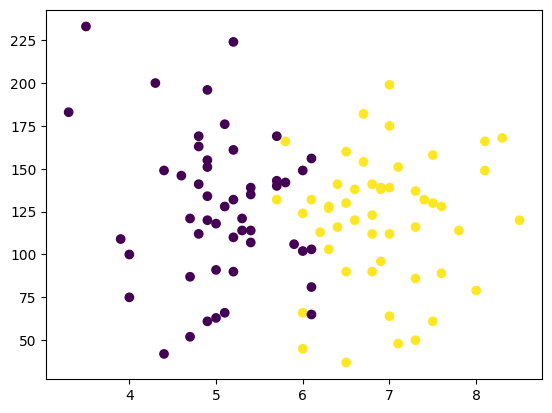

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [13]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [17]:
x_train

,cgpa,iq
53,8.3,168.0
56,6.1,65.0
8,6.1,156.0
61,7.3,137.0
90,7.3,86.0
...,...,...
50,3.5,233.0
43,6.8,141.0
39,4.6,146.0
32,7.0,139.0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
x_train=scaler.fit_transform(x_train)

In [23]:
x_train

array([[ 2.03407424,  1.07753537],
       [ 0.09312629, -1.46090247],
       [ 0.09312629,  0.78179504],
       [ 1.15182517,  0.31353952],
       [ 1.15182517, -0.94335689],
       [-0.70089787,  2.45765692],
       [-0.08332352, -0.45045634],
       [-0.70089787, -0.35187623],
       [ 0.53425082,  0.33818455],
       [ 0.88715045,  1.84153123],
       [ 0.71070064, -0.03149087],
       [-1.0537975 ,  1.1021804 ],
       [ 0.88715045, -0.30258617],
       [ 1.15182517, -1.83057788],
       [-0.25977334,  0.3874746 ],
       [-0.78912278,  1.27469559],
       [-0.52444806, -0.25329612],
       [ 0.1813512 , -0.27794114],
       [ 0.97537536, -1.87986794],
       [-1.0537975 ,  0.41211963],
       [ 0.00490138,  0.60927985],
       [-0.17154843,  1.02824532],
       [-0.78912278, -1.43625744],
       [ 1.32827499, -1.55948258],
       [ 1.85762443,  0.60927985],
       [ 0.00490138, -0.00684584],
       [-0.78912278,  0.09173427],
       [ 0.2695761 ,  0.06708924],
       [-0.96557259,

In [24]:
x_test=scaler.fit_transform(x_test)

In [25]:
x_test

array([[ 1.81879176,  1.59333357],
       [ 0.11898638, -0.4678577 ],
       [ 0.11898638, -1.18763878],
       [-0.90089685, -1.84198521],
       [-1.3258482 ,  1.0371391 ],
       [ 0.54393772,  0.08833677],
       [-0.56093578,  0.12105409],
       [-0.47594551, -0.33698841],
       [-0.90089685,  1.10257374],
       [ 1.56382095, -0.10796716]])

In [26]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [27]:
clf.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred=clf.predict(x_test)

In [29]:
y_test

,placement
65,1
14,0
78,0
73,0
88,0
20,1
2,0
81,0
89,0
55,1


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

In [37]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

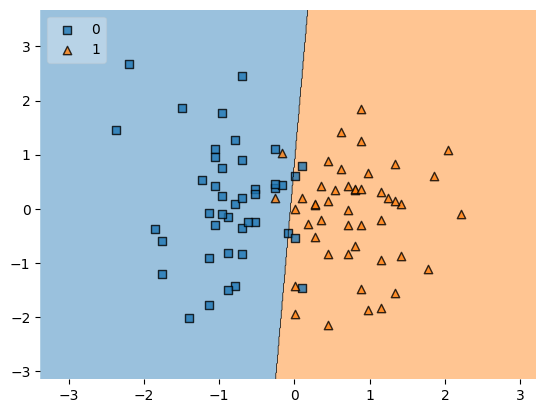

In [39]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))